# Housing Price Prediction

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [2]:
import numpy as np
import pandas as pd

### Task 1. Reading and Preparing

In [3]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [4]:
!pip install seaborn

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

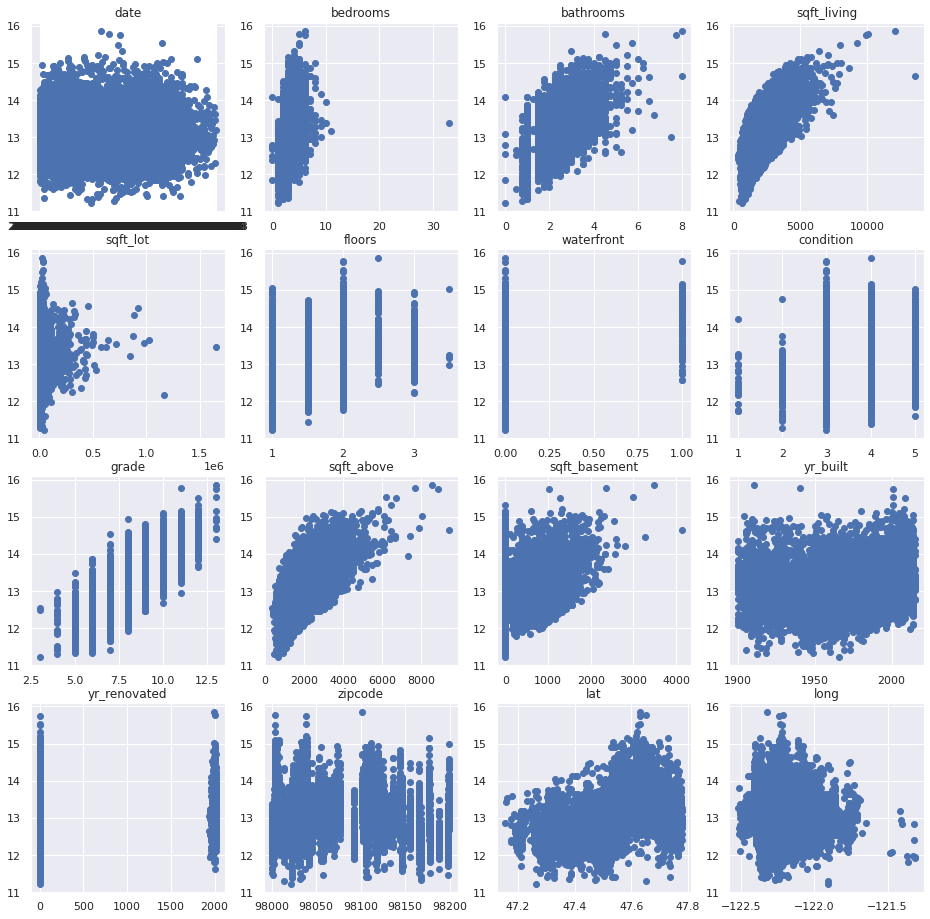

In [6]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

In [7]:
#your code goes here
X= datX[["bedrooms","bathrooms","sqft_living","floors","condition","grade","sqft_above","sqft_basement","long","lat"]]
N= X.shape[0]
m= X.shape[1]
print(N,m)

15000 10


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$


In [9]:
def loss(w, X, y):
    X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X), axis =1)
    lossValue = np.square(np.subtract(y, np.dot(X,w))).mean()
    return lossValue


In [10]:
def grad(w_k, X, y):
    X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X), axis =1)
    
    lossGradient = -2*np.dot(X.transpose(), np.subtract(y, np.dot(X, w_k)))/(X.shape[0])
    
    return lossGradient

In [11]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    
    curiter=0
    w_k=weights[-1]
    
    grad_value = grad(w_k, X, y)
    while curiter < maxiter and np.max(np.abs(grad_value)) > eps:
        curiter +=1
        
        w_k = w_k - alpha*grad_value
        lossValue_k = loss(w_k, X, y)
        weights.append(w_k)
        losses.append(lossValue_k)
        
        grad_value = grad(w_k, X, y)
        
    return weights, losses

In [ ]:
plt.figure(figsize=(8,8))

y = datY
alphas = [0.001, 0.005, 0.01, 0.1, 0.5]
initial_weight_list = [np.zeros(shape = (X.shape[1]+1,1)), np.ones(shape = (X.shape[1]+1,1)), np.random.rand(X.shape[1]+1,1)]

best_regressor_weights = None
best_regressor_loss = np.inf 

model_losses = {}
model_weights = {}

for alpha_index in range(len(alphas)):
    alpha = alphas[alpha_index]
    for w_index in range(len(initial_weight_list)):
        w_init = initial_weight_list[w_index]
        weights, losses = gradDescent(w_init, alpha, X, y)
        
        model_losses[str(alpha_index) + "_" + str(w_index)] = losses[-1]
        model_weights[str(alpha_index) + "_" + str(w_index)] = weights[-1]
        
        if losses[-1] < best_regressor_loss :
            best_regressor_loss = losses[-1]
            best_regressor_weights = weights[-1]
        
        plt.plot(np.arange(len(losses)), losses)
        plt.xlabel("Iterations for alpha: " + str(alpha))
        plt.ylabel("Loss Value for w_index: "+ str(w_index))
        plt.legend("Alpha = " + str(alpha))
        plt.show()

In [ ]:
house_indexes = [1, 10, 55, 1500, 2000, 2999, 4343, 4698]
w_final = best_regressor_weights
error_list = []
for index in house_indexes:
    y_true = y[index]
    y_pred = np.dot(X[index], w_final)
    error = np.abs(y_true, y_pred)
    print("Y_true: " + y_true +"  :: y_pred: " + str(y_pred) + "  :: Error: " + str(error))
    percentage_error = error*100/y_true
    error_list.append(percentage_error)

print("max percentage error value in list": np.max(error_list))
print("min percentage error value in list": np.min(error_list))
print("avg percentage error value in list": np.average(error_list))



Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough?

In [ ]:
for key, value in model_weights:
    print("############################")
    print("Key: " + str(key))
    print(value)
    
    print("############################")

for key, value in model_losses:
    
    print("############################")
    print("Key: " + str(key))
    print(value)
    
    print("############################")
    

# Does the method converge at least for some alpha? If not, what might be the workaround?
1. Yes. Indeed the method converge for values of alpha.
2. Workaround in case of non convergence
    a. Increase the number of iterations to allow for convergence
    b. Decrease the value of alpha if divergence is happening due to high value of alpha
    c. Increase the value of alpha if convergence is too slow for the iterations count.


# How does changing of the alpha influence the speed of convergence?

1. As observed from graphs, increased value of alpha speed up the convergence rate
2. Higher values of alpha may cause the algorithm to diverge

# Are the optimal weights in all convergent cases the same?
No. Based on the intial value of weights and alpha; final weights differ.

# How does this affect the Loss function?
This implies that loss function is susceptible to values of initial weights and value of alpha i.e. learning rate.